In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")


In [2]:
DATA_PATH = "customer_pd_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()


Shape: (17415, 9)


,total_orders,total_sales,total_profit,avg_discount,avg_shipping_delay,return_rate,customer_tenure_days,orders_per_year,default_flag
0,2,544.6560,-153.0540,0.4167,3.3333,0.0000,918,0.7952,0
1,1,"2,713.4100",27.0900,0.0000,5.0000,0.0000,0,1.0000,0
2,4,"2,955.7980",514.6680,0.0308,2.6923,0.0000,319,4.5768,0
3,2,"4,780.5520",-650.5971,0.1333,5.0000,0.0000,483,1.5114,0
4,2,753.5080,274.4320,0.0667,4.3333,0.0000,553,1.3201,0


In [3]:
DATA_PATH = "customer_pd_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()


Shape: (17415, 9)


,total_orders,total_sales,total_profit,avg_discount,avg_shipping_delay,return_rate,customer_tenure_days,orders_per_year,default_flag
0,2,544.6560,-153.0540,0.4167,3.3333,0.0000,918,0.7952,0
1,1,"2,713.4100",27.0900,0.0000,5.0000,0.0000,0,1.0000,0
2,4,"2,955.7980",514.6680,0.0308,2.6923,0.0000,319,4.5768,0
3,2,"4,780.5520",-650.5971,0.1333,5.0000,0.0000,483,1.5114,0
4,2,753.5080,274.4320,0.0667,4.3333,0.0000,553,1.3201,0


In [4]:
print(df.dtypes)

missing = df.isna().mean().sort_values(ascending=False)
display(missing[missing > 0].to_frame("missing_rate"))


total_orders              int64
total_sales             float64
total_profit            float64
avg_discount            float64
avg_shipping_delay      float64
return_rate             float64
customer_tenure_days      int64
orders_per_year         float64
default_flag              int64
dtype: object


,missing_rate


In [6]:
#Finance expectation:
#not too tiny (<1%) and not too huge (>30%).
#If it is, we’ll adjust the proxy rule later.

assert "default_flag" in df.columns, "default_flag column not found"

bad_rate = df["default_flag"].mean()
print(f"Bad rate (default rate): {bad_rate:.2%}")

display(df["default_flag"].value_counts())
display(df["default_flag"].value_counts(normalize=True))


Bad rate (default rate): 1.54%


,count
default_flag,
0,17146
1,269


,proportion
default_flag,
0,0.9846
1,0.0154


In [7]:
# good vs bad customers
numeric_cols = [c for c in df.columns if c != "default_flag"]

summary = (df
           .groupby("default_flag")[numeric_cols]
           .agg(["count","mean","median","min","max"])
          )
summary


total_orders                       total_sales                    \
                    count   mean median min max       count     mean   median   
default_flag                                                                    
0                   17146 1.4728 1.0000   1   9       17146 727.1287 326.3700   
1                     269 1.8104 2.0000   1   6         269 651.1297 362.3760   

                                total_profit                                 \
                min         max        count      mean   median         min   
default_flag                                                                  
0            0.5560 23,669.1960        17146   88.3978  31.9100 -6,892.3748   
1            2.6520  5,199.6090          269 -179.2253 -76.6170 -1,644.0960   

                        avg_discount                              \
                    max        count   mean median    min    max   
default_flag                                                       
0            8,745.0635        17146 0.1407 0.0007 0.0000 0.8000   
1               -0.0060          269 0.3926 0.4000 0.0020 0.8000   

             avg_shipping_delay                             return_rate  \
                          count   mean median    min    max       count   
default_flag                                                              
0                         17146 3.9664 4.0000 0.0000 7.0000       17146   
1                           269 3.9498 4.0000 0.0000 7.0000         269   

                                          customer_tenure_days           \
               mean median    min     max                count     mean   
default_flag                                                              
0            0.0606 0.0000 0.0000 10.0000                17146 178.8600   
1            1.4958 1.0000 0.2000  8.0000                  269 313.9071   

                               orders_per_year                                
              median min   max           count   mean median    min      max  
default_flag                                                                  
0             0.0000   0  1451           17146 2.5234 1.0000 0.5031 730.0000  
1            73.0000   0  1441             269 4.9525 1.0000 0.6186 730.0000

In [9]:
# decide whether to:
#log-transform total_sales
#clip extreme values (winsorize)
#cap return_rate to [0,1]

df[numeric_cols].describe(percentiles=[.01,.05,.10,.25,.5,.75,.90,.95,.99]).T


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
total_orders,"17,415.0000",1.4780,0.8521,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,3.0000,3.0000,5.0000,9.0000
total_sales,"17,415.0000",725.9547,"1,064.7512",0.5560,7.0959,18.1480,31.7448,98.3450,326.9940,912.8540,"1,906.9728","2,764.9185","4,939.3218","23,669.1960"
total_profit,"17,415.0000",84.2640,343.3304,"-6,892.3748",-797.3824,-257.9808,-104.6088,-0.7740,30.2400,138.5453,364.0740,579.0387,"1,201.2805","8,745.0635"
avg_discount,"17,415.0000",0.1446,0.2042,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,0.2400,0.5000,0.6000,0.7000,0.8000
avg_shipping_delay,"17,415.0000",3.9661,1.5742,0.0000,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,6.0000,7.0000,7.0000
return_rate,"17,415.0000",0.0828,0.4486,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,2.0000,10.0000
customer_tenure_days,"17,415.0000",180.9460,337.3234,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,213.0000,766.0000,"1,003.0000","1,257.8600","1,451.0000"
orders_per_year,"17,415.0000",2.5609,18.3959,0.5031,0.6438,0.9530,1.0000,1.0000,1.0000,1.0219,2.5172,4.7127,22.3153,730.0000


In [10]:
def bad_rate_by_quantile(data, feature, q=10):
    d = data[[feature, "default_flag"]].dropna().copy()
    try:
        d["bin"] = pd.qcut(d[feature], q=q, duplicates="drop")
    except ValueError:
        d["bin"] = pd.qcut(d[feature], q=5, duplicates="drop")

    out = (d.groupby("bin")
             .agg(n=("default_flag","size"),
                  bad_rate=("default_flag","mean"),
                  feature_min=(feature,"min"),
                  feature_max=(feature,"max"))
             .reset_index(drop=True)
          )
    return out

features_to_bin = [c for c in numeric_cols if c in df.columns]

tables = {}
for f in features_to_bin:
    t = bad_rate_by_quantile(df, f, q=10)
    tables[f] = t
    print(f"\n=== Bad rate by {f} ===")
    display(t)



=== Bad rate by total_orders ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,15446,0.0139,1,2
1,1311,0.0290,3,3
2,658,0.0243,4,9



=== Bad rate by total_sales ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,1742,0.0149,0.5560,31.7400
1,1741,0.0126,31.7520,70.4340
2,1742,0.0138,70.4400,129.4000
3,1741,0.0190,129.4680,209.6800
4,1742,0.0144,209.7000,326.9940
5,1741,0.0149,327.1200,505.5000
6,1741,0.0201,505.5600,744.2040
7,1742,0.0172,744.3000,"1,146.3600"
8,1741,0.0167,"1,146.7800","1,906.8360"
9,1742,0.0109,"1,907.0640","23,669.1960"



=== Bad rate by total_profit ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,1742,0.0631,"-6,892.3748",-104.6280
1,1741,0.0620,-104.5800,-14.5140
2,1742,0.0293,-14.4960,3.4200
3,1741,0.0000,3.4200,13.2324
4,1746,0.0000,13.2480,30.2400
5,1737,0.0000,30.2418,56.9256
6,1741,0.0000,56.9700,103.9545
7,1742,0.0000,103.9546,187.1614
8,1741,0.0000,187.1670,363.8400
9,1742,0.0000,364.2300,"8,745.0635"



=== Bad rate by avg_discount ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,8725,0.0001,0.0000,0.0020
1,2527,0.0075,0.0091,0.1000
2,1563,0.0186,0.1003,0.2000
3,1233,0.0454,0.2003,0.3500
4,2125,0.0494,0.3502,0.5000
5,1242,0.0475,0.5003,0.8000



=== Bad rate by avg_shipping_delay ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,3077,0.0123,0.0000,2.0000
1,406,0.0296,2.0833,2.7000
2,1790,0.0156,2.7143,3.2500
3,4807,0.0164,3.2727,4.0000
4,415,0.0313,4.0909,4.3333
5,3963,0.0141,4.3529,5.0000
6,2118,0.0161,5.0769,6.0000
7,839,0.0107,6.1667,7.0000



=== Bad rate by return_rate ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,17415,0.0154,0.0000,10.0000



=== Bad rate by customer_tenure_days ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,12194,0.0107,0,38
1,1740,0.0241,39,385
2,1740,0.0299,386,766
3,1741,0.0253,767,1451



=== Bad rate by orders_per_year ===


/tmp/ipython-input-1040305114.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (d.groupby("bin")


,n,bad_rate,feature_min,feature_max
0,12988,0.0115,0.5031,1.0000
1,944,0.0328,1.0009,1.3452
2,1751,0.0297,1.3456,2.5172
3,1732,0.0214,2.5260,730.0000


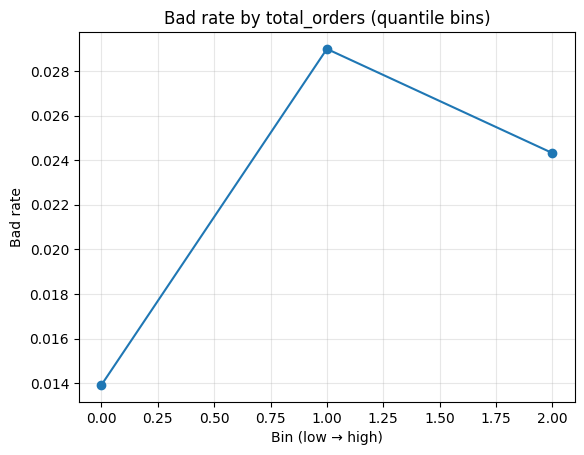

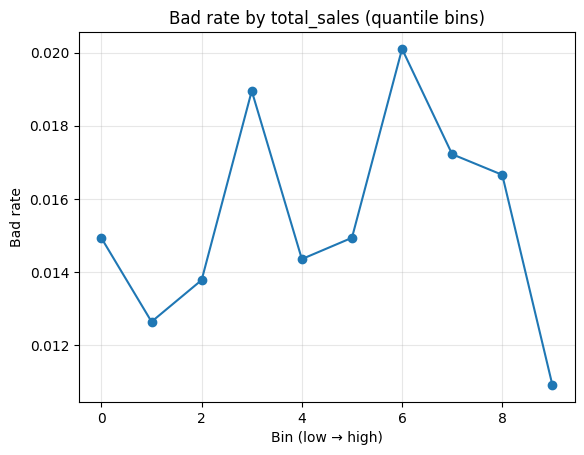

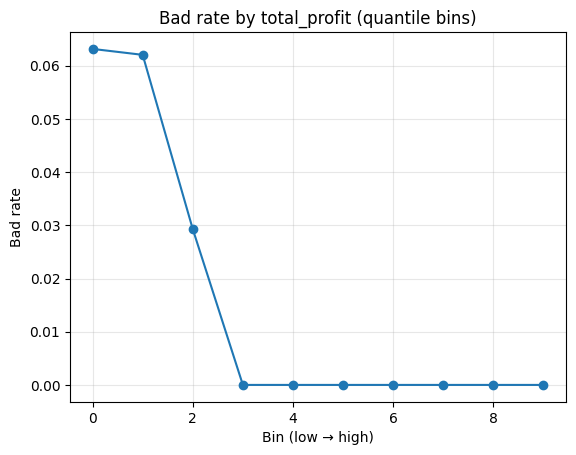

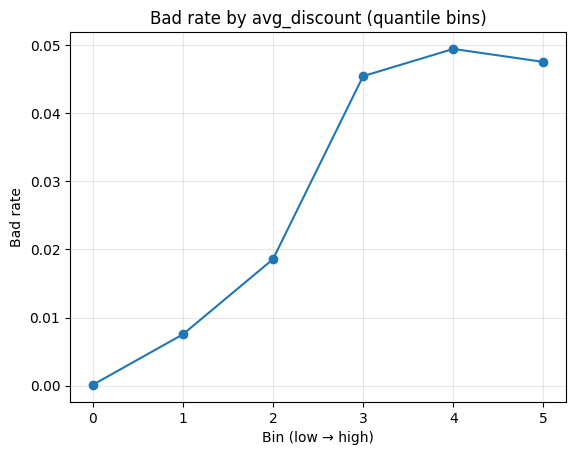

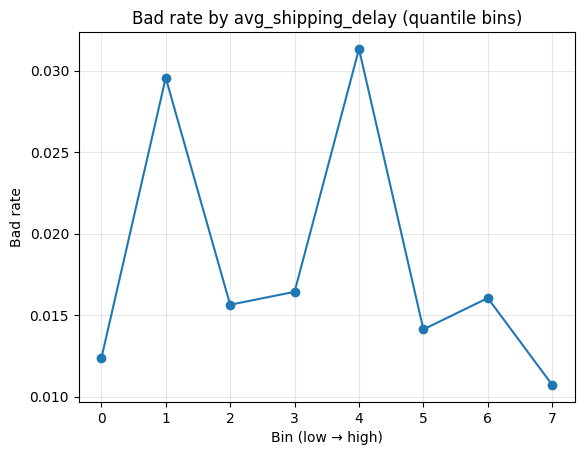

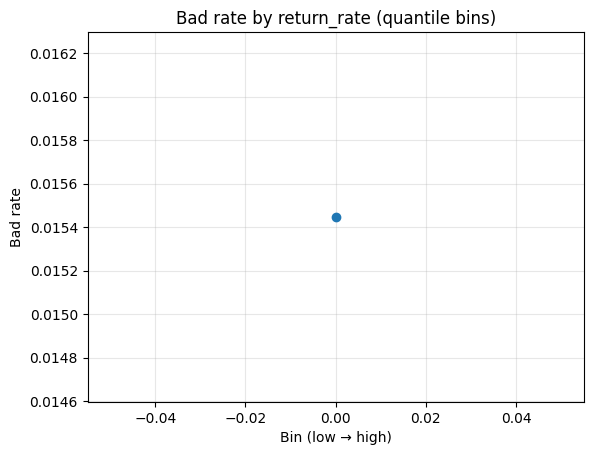

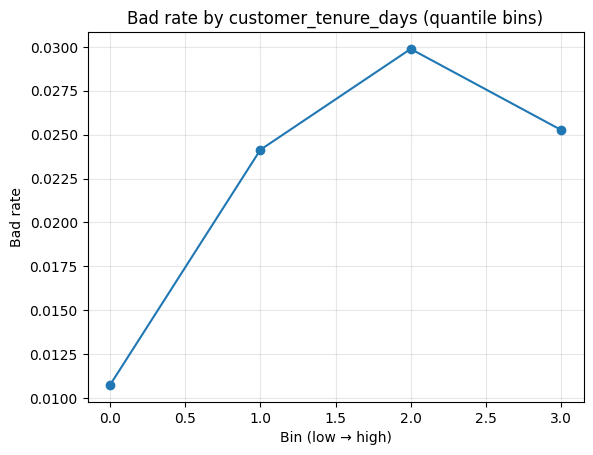

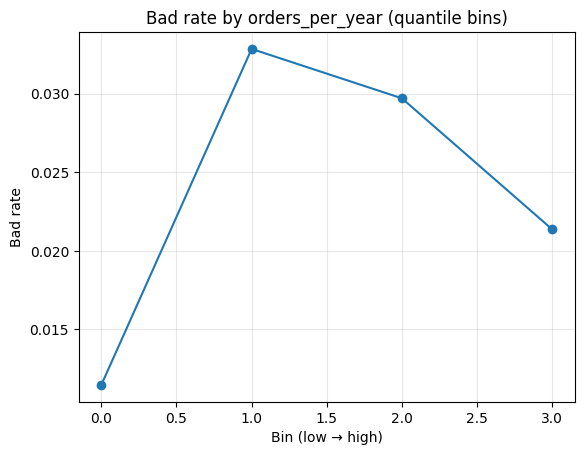

In [11]:
#We want drivers where risk increases/decreases consistently across bins.
def plot_bad_rate_curve(table, title):
    x = np.arange(len(table))
    y = table["bad_rate"].values

    plt.figure()
    plt.plot(x, y, marker="o")
    plt.title(title)
    plt.xlabel("Bin (low → high)")
    plt.ylabel("Bad rate")
    plt.grid(True, alpha=0.3)
    plt.show()

for f, t in tables.items():
    plot_bad_rate_curve(t, f"Bad rate by {f} (quantile bins)")


In [12]:
# This shows which features differ most between good and bad customers.
separation = []
for c in numeric_cols:
    good = df.loc[df["default_flag"] == 0, c].dropna()
    bad  = df.loc[df["default_flag"] == 1, c].dropna()
    if len(good) > 0 and len(bad) > 0:
        separation.append({
            "feature": c,
            "mean_good": good.mean(),
            "mean_bad": bad.mean(),
            "median_good": good.median(),
            "median_bad": bad.median(),
            "ratio_bad_to_good_mean": (bad.mean() / good.mean()) if good.mean() != 0 else np.nan
        })

sep_df = pd.DataFrame(separation).sort_values("ratio_bad_to_good_mean", ascending=False)
sep_df


,feature,mean_good,mean_bad,median_good,median_bad,ratio_bad_to_good_mean
5,return_rate,0.0606,1.4958,0.0000,1.0000,24.6749
3,avg_discount,0.1407,0.3926,0.0007,0.4000,2.7899
7,orders_per_year,2.5234,4.9525,1.0000,1.0000,1.9626
6,customer_tenure_days,178.8600,313.9071,0.0000,73.0000,1.7550
0,total_orders,1.4728,1.8104,1.0000,2.0000,1.2293
4,avg_shipping_delay,3.9664,3.9498,4.0000,4.0000,0.9958
1,total_sales,727.1287,651.1297,326.3700,362.3760,0.8955
2,total_profit,88.3978,-179.2253,31.9100,-76.6170,-2.0275


,default_flag
default_flag,1.0000
return_rate,0.3946
avg_discount,0.1521
customer_tenure_days,0.0494
total_orders,0.0489
orders_per_year,0.0163
avg_shipping_delay,-0.0013
total_sales,-0.0088
total_profit,-0.0961


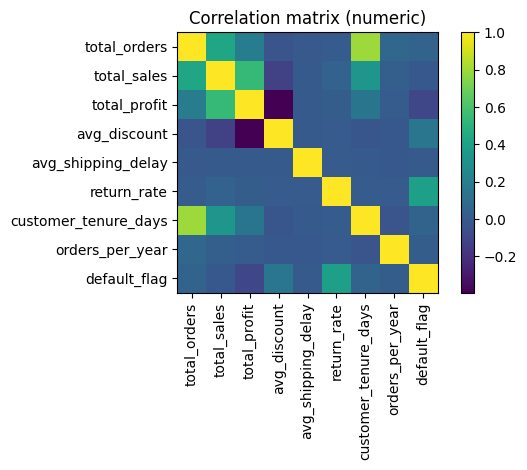

In [13]:
corr = df[numeric_cols + ["default_flag"]].corr(numeric_only=True)
display(corr["default_flag"].sort_values(ascending=False))

plt.figure()
plt.imshow(corr.values)
plt.title("Correlation matrix (numeric)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()


In [15]:
# total_profit almost perfectly separates the target, consider:
#dropping it for modeling, OR
#transforming to something less “target-imprinted” (e.g., profit margin, avg profit/order),
#depending on your story.
if "total_profit" in df.columns:
    display(df.groupby("default_flag")["total_profit"].describe())


,count,mean,std,min,25%,50%,75%,max
default_flag,,,,,,,,
0,"17,146.0000",88.3978,342.7677,"-6,892.3748",0.4170,31.9100,141.4650,"8,745.0635"
1,269.0000,-179.2253,268.7649,"-1,644.0960",-211.7760,-76.6170,-21.6900,-0.0060


In [16]:
eda_decisions = []

eda_decisions.append({
    "Decision": "Bad rate",
    "Choice": f"{bad_rate:.2%}",
    "Reason": "Check class balance realism for PD proxy"
})

eda_decisions.append({
    "Decision": "Key drivers",
    "Choice": "Select features with monotonic bad-rate curves and clear separation",
    "Reason": "Preferred for stable scorecards and robust models"
})

if "total_profit" in df.columns:
    eda_decisions.append({
        "Decision": "Leakage caution",
        "Choice": "Review total_profit for target imprinting; may exclude from final model",
        "Reason": "Proxy default uses profit < 0"
    })

decision_df = pd.DataFrame(eda_decisions)
decision_df


,Decision,Choice,Reason
0,Bad rate,1.54%,Check class balance realism for PD proxy
1,Key drivers,Select features with monotonic bad-rate curves...,Preferred for stable scorecards and robust models
2,Leakage caution,Review total_profit for target imprinting; may...,Proxy default uses profit < 0


In [18]:
#Default = 1 if ANY of the following is true:
#1) return_rate ≥ 30%
#OR
#2) (return_rate ≥ 15% AND total_profit < 0)
#OR
#3) avg_discount ≥ 40% AND total_profit < 0

customer_df = df.copy()  # or re-load your customer-level table

customer_df["default_flag_v2"] = np.where(
    (customer_df["return_rate"] >= 0.30) |
    ((customer_df["return_rate"] >= 0.15) & (customer_df["total_profit"] < 0)) |
    ((customer_df["avg_discount"] >= 0.40) & (customer_df["total_profit"] < 0)),
    1,
    0
)

# Check new bad rate
bad_rate_v2 = customer_df["default_flag_v2"].mean()
print(f"Updated bad rate: {bad_rate_v2:.2%}")

customer_df["default_flag_v2"].value_counts(normalize=True)



Updated bad rate: 22.03%


,proportion
default_flag_v2,
0,0.7797
1,0.2203


In [19]:
customer_df = df.copy()

customer_df["default_flag_v3"] = np.where(
    (customer_df["return_rate"] >= 0.40) |
    (
        (customer_df["return_rate"] >= 0.20) &
        (customer_df["total_profit"] < 0) &
        (customer_df["avg_discount"] >= 0.30)
    ),
    1,
    0
)

# Check new bad rate
bad_rate_v3 = customer_df["default_flag_v3"].mean()
print(f"Final bad rate (v3): {bad_rate_v3:.2%}")

customer_df["default_flag_v3"].value_counts(normalize=True)


Final bad rate (v3): 5.33%


,proportion
default_flag_v3,
0,0.9467
1,0.0533
